# Bài tập lập trình: Logistic Regression

```
ProtonX - TensorFlow Class 
```

### Hướng dẫn làm bài 
- Trong bài tập này bạn sẽ sử dụng Python 3.


### [Quan trọng] Chú ý
- **Không sử dụng hàm `input()` tại bất kỳ dòng lệnh nào**


Các bạn sẽ thực hiện `code` trong các phần hiển thị `#TODO` và thay thế các vị trí `None`.

Sau khi viết xong Code của bạn, bạn hãy ấn "SHIFT"+"ENTER" để thực hiện chạy lệnh của Cell đó. 

---
Điểm số:
* 10 điểm / Câu

Tiêu chí chấm điểm:
* Phải có log quá trình training
* Độ chính xác mô hình trên 89%

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
df = pd.read_csv('./Data/marks.txt',  names = ['a','b','c'])

In [ ]:
X = df.iloc[:, :-1]

In [ ]:
df

,a,b,c
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [ ]:
Y = df.iloc[:, -1]

Hiển thị dữ liệu

In [ ]:
reds = df.loc[Y == 0] # Reds: 0

In [ ]:
blues = df.loc[Y == 1] # Blues: 1

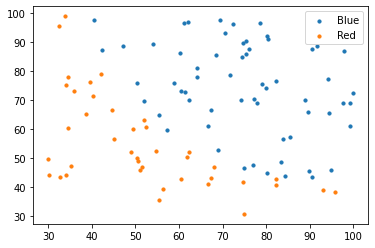

In [ ]:
plt.scatter(blues.iloc[:, 0], blues.iloc[:, 1], s=10, label='Blue')
plt.scatter(reds.iloc[:, 0], reds.iloc[:, 1], s=10, label='Red')
plt.legend()
plt.show()

Tách thành bộ Train và Test

In [ ]:
X = df.iloc[:, :-1]
X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
Y = df.iloc[:, -1]
Y = np.reshape(Y.to_numpy(), (Y.shape[0], 1))

In [ ]:
trainX, testX = X[:80], X[80:]
trainY, testY = Y[:80], Y[80:]

Định nghĩa các hàm

In [ ]:
def cal_z(x, theta):
    """
    Parameters
    ----------
    x shape: (m, 3) 
    theta shape: (3, 1)
    Returns
    ----------
    z shape (m, 1)
    """
    # TODO 1
    return np.dot(x,theta)

In [ ]:
def sigmoid(z):
    """
    Parameters
    z shape: (m, 1)
    Returns
    output shape: (m, 1)
    """
    # TODO 2
    return 1 / ( 1 + np.exp(-z))

In [ ]:
def cal_h_theta(x, theta):
    """
    Parameters
    ----------
    x shape: (m, 3)
    theta shape: (3, 1)
    Returns
    ----------
    output shape: (m, 1)
    """
    # TODO 3
    return sigmoid( cal_z(x, theta))

In [ ]:

def cost_func(x, y, theta):
    """
    Parameters
    ----------
    x shape: (m, 3)
    y shape: (m, 1)
    theta shape: (3, 1)
    Returns
    ----------
    loss: float
    """
    # TODO 4
    a = x.shape[0]
    h_theta =cal_h_theta(x, theta)
    cost = -(y*np.log(h_theta) + (1-y)*np.log(1 - h_theta))
    return np.mean(cost)

In [ ]:
def gradient(X, y, theta):
    """
    Parameters
    ----------
    X shape: (m, 3)
    y shape: (m, 1)
    theta shape: (3, 1)
    Returns
    ----------
    grad shape: (3, 1)
    """
    # TODO 5
    
    h_theta = cal_h_theta(X, theta)
    grad = np.mean(np.dot(X.T,(h_theta - y)), axis = 0)
    return grad.reshape(grad.shape[0],1)

Chuẩn hóa dữ liệu

In [ ]:
# Đưa về phân phối chuẩn đơn vị trên cả tập train và test + không sử dụng thư viện ngoài numpy
def normalize_data(train_x, test_x):
    # TODO 6 + 7
    train_mean = np.mean(train_x, axis= (0,1),dtype= np.float64, keepdims= True)
    train_std = np.std(train_x,axis= (0,1),dtype= np.float64, keepdims= True)
    
    train_x =(train_x - train_mean) / train_std 
    test_x = (test_x -train_mean) / train_std
    return train_x, test_x

In [ ]:
trainX, testX = normalize_data(trainX, testX)

In [ ]:

trainY.shape

(80, 1)

Tiến hành training

In [ ]:
epochs = 2000
learning_rate = 0.03
theta = np.random.normal(size=3).reshape((3, 1))
for e in range(epochs):
    m =trainX.shape[0]
    # TODO 8: Tính gradient
    grad = gradient(trainX, trainY, theta)
    
    # TODO 9: Update theta
    theta = theta - learning_rate * grad
    # TODO 10
    total_cost = cost_func(trainX, trainY, theta)
    
    
    if e % 100 == 0:
        print(total_cost)
    

print('Training finished')

0.8857016391598579
0.2292136395828507
0.2182835285960368
0.2156459476896515
0.2147625154700994
0.2144227218628541
0.2142821189441225
0.21422139535228527
0.2141944652770173
0.21418231734729093
0.21417677613900105
0.21417422977827627
0.21417305382690213
0.21417250893348738
0.21417225587692643
0.2141721381727745
0.21417208336772725
0.2141720578313652
0.21417204592693356
0.21417204037553567
Training finished


Tiến hành dự đoán

In [ ]:
predicted_classes = (cal_h_theta(testX, theta) >= 0.5).astype(int)

In [ ]:
accuracy = np.mean(predicted_classes == testY) * 100

In [ ]:
accuracy

90.0

Yêu cầu độ chính xác lớn hơn 89%

In [ ]:
accuracy > 89

True